In [1]:
import pandas as pd
df = pd.read_csv('/Users/dingjiadong/Desktop/uber/cab_rides.csv')
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [2]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='ms')#13 digits milliseconds
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


探索行程长度和价格的关系

In [10]:
df_dp = df[['distance','price']].groupby('distance').mean()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = df_dp.index
y = df_dp.price

np.corrcoef(x, y)

array([[1.        , 0.94029815],
       [0.94029815, 1.        ]])

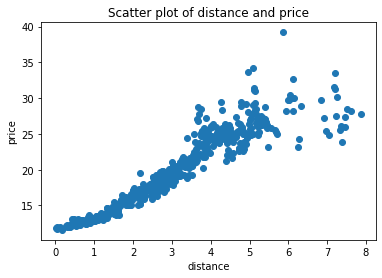

In [17]:
plt.scatter(x,y)
plt.xlabel('distance')
plt.ylabel('price')
plt.title('Scatter plot of distance and price')

plt.show()

根据相关系数的计算，价格与距离之间高度正相关；价格与距离的散点图呈现一个斜向上的趋势，距离越长，价格会越高。

探索行程类型与价格的关系

In [22]:
lyft = df[df['cab_type']=='Lyft']
#lyft

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693042,3.11,Lyft,2018-11-29 01:03:40.023,Fenway,Theatre District,16.5,1.0,086e7cda-2b2d-4736-9d5f-0cd234e04e63,lyft_plus,Lyft XL
693043,3.11,Lyft,2018-11-29 01:03:40.023,Fenway,Theatre District,22.5,1.0,177a946d-c7c8-4334-a97a-a8a48efb1bc0,lyft_premier,Lux
693048,3.11,Lyft,2018-11-29 01:47:08.123,Fenway,Theatre District,7.0,1.0,871dc1be-d51e-4334-9217-1a6cd00d5058,lyft_line,Shared
693051,3.11,Lyft,2018-11-29 01:47:08.123,Fenway,Theatre District,10.5,1.0,aa4e5808-7357-49d3-b539-bd04d4815665,lyft,Lyft


In [23]:
uber = df[df['cab_type']=='Uber']

In [25]:
uber.price

12        12.0
13        16.0
14         7.5
15         7.5
16        26.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 385663, dtype: float64

In [27]:
lyft.price

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693042    16.5
693043    22.5
693048     7.0
693051    10.5
693053    32.5
Name: price, Length: 307408, dtype: float64

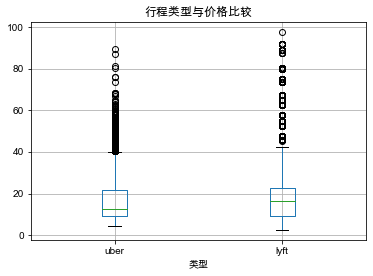

In [31]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df_tp = pd.DataFrame({'uber':uber.price,'lyft':lyft.price})
df_tp.boxplot()
plt.xlabel('类型')
plt.title('行程类型与价格比较')
plt.show()

uber的价格分布较lyft更集中，最大值与最小值更接近均值；uber的价格总体分布略低于lyft，均值与50%的观测值都略低于lyft。